# Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

Dataset: https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/

This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [352]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis

%matplotlib inline

dataset = 'amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(dataset)

df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [353]:
df.shape

(2443651, 9)

In [354]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [355]:
df.nunique()

uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

In [356]:
df['category'].unique()

array(['Hi-Fi Speakers', 'CD, Disc & Tape Players', 'Wearable Technology',
       'Light Bulbs', 'Bathroom Lighting',
       'Heating, Cooling & Air Quality', 'Coffee & Espresso Machines',
       'Lab & Scientific Products', 'Smart Speakers',
       'Motorbike Clothing', 'Motorbike Accessories',
       'Motorbike Batteries', 'Motorbike Boots & Luggage',
       'Motorbike Chassis', 'Handmade Home & Kitchen Products',
       'Hardware', 'Storage & Home Organisation',
       'Fireplaces, Stoves & Accessories', 'PC Gaming Accessories',
       'USB Gadgets', 'Blank Media Cases & Wallets', 'Car & Motorbike',
       'Boys', 'Sports & Outdoors', 'Microphones', 'String Instruments',
       'Karaoke Equipment', 'PA & Stage',
       'General Music-Making Accessories', 'Wind Instruments',
       'Handmade Gifts', 'Fragrances', 'Calendars & Personal Organisers',
       'Furniture & Lighting', 'Computer Printers', 'Ski Goggles',
       'Snowboards', 'Skiing Poles', 'Downhill Ski Boots',
       'Hiki

In [357]:
df.duplicated().sum()

0

In [358]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [359]:
# Identifying columns in the dataframe where over 80% of the values are missing
df.columns[df.isnull().mean() > 0.8]

Index([], dtype='object')

In [360]:
# Extracting column names with numerical data types from the dataframe
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [361]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [362]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)
df_categorical

,asin,title,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,Hi-Fi Speakers
...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",Motorbike Clothing
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,Motorbike Clothing
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,Motorbike Clothing
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,Motorbike Clothing


In [363]:
# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
df_numerical

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443646,2828589,0.0,0,22.34,0
2443647,2828590,0.0,0,97.99,0
2443648,2828591,0.0,0,52.99,0
2443649,2828592,4.3,404,79.99,0


## Part 1: Understanding Product Categories
__Business Question:__ 
What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. Frequency Tables:
   * Generate a frequency table for the product category.
   * Which are the top 5 most listed product categories?

In [365]:
# Frecuency table for 'category'
category_frequency = df['category'].value_counts()
display(category_frequency)
#category_counts.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Plugs                                        107
Alexa Built-In Devices                       107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [366]:
# Calculating the proportion of each unique value in the 'category'
category_proportion = df['category'].value_counts(normalize=True)

display(category_proportion)

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Alexa Built-In Devices                    0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

In [367]:
# Creating a crosstab table for the 'category' column, counting occurrences for each unique value
my_table = pd.crosstab(index = df_categorical["category"],  # Make a crosstab
                              columns="count")      # Name the count column
my_table

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


2. Visualizations:
   * Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
   * For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [369]:
# There is a huge number of unique categories, I'll take only the top 8

# Get the top 8 most listed categories
top_8_categories = df['category'].value_counts().head(8)
print(top_8_categories)

# Filter the df to only include the top 10 categories
#df_top_10 = df[df['category'].isin(top_10_categories.index)]
#print(df_top_10)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Name: count, dtype: int64


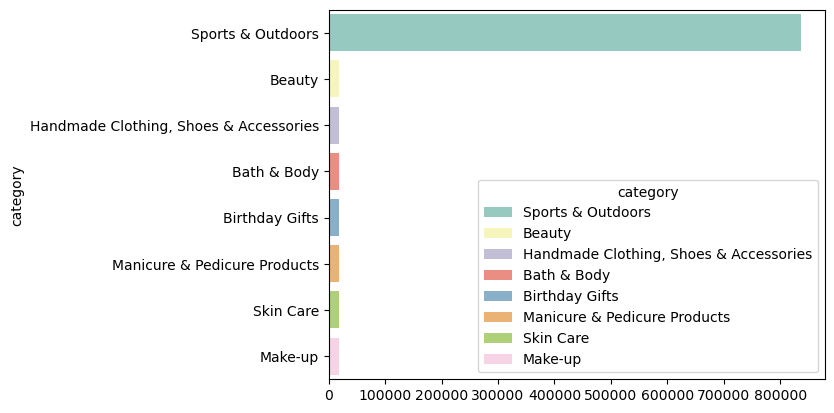

In [370]:
ax=sns.barplot(y=top_8_categories.index, x=top_8_categories.values, palette="Set3", hue=top_8_categories.index, legend='full')
sns.move_legend(ax, "lower right")

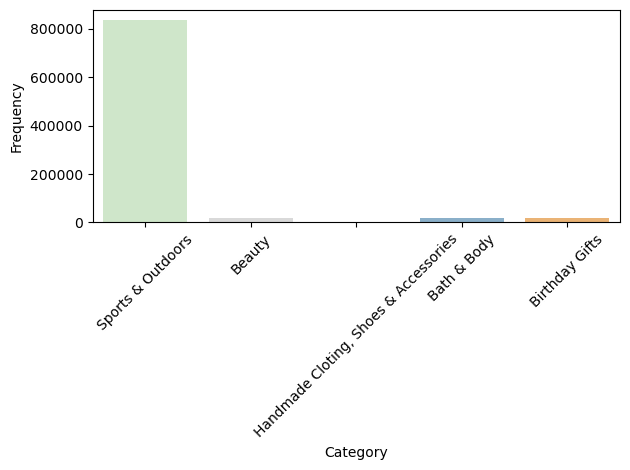

In [371]:
# Plotting a bar chart using the 'count' values from 'my_table', with colors sourced from the "Set3" palette
fig, axes = plt.subplots()
sns.barplot(x=my_table.index, y=my_table["count"], palette="Set3",hue=my_table.index, legend=False
            ,order=['Sports & Outdoors', 'Beauty', 'Handmade Cloting, Shoes & Accessories','Bath & Body','Birthday Gifts'],ax=axes)
axes.set_ylabel("Frequency")
axes.set_xlabel("Category")

# Rotate x-axis labels transversally (45 degrees to make it fully horizontal)
plt.xticks(rotation=45)  # Change to 45 if you prefer diagonal labels
plt.tight_layout()  # Ensures the labels fit within the plot

plt.show()

([<matplotlib.patches.Wedge at 0x1e9816180>,
 [Text(0.6292646731933736, -0.9022338782548773, 'Sports & Outdoors'),
  Text(-0.4403092545010633, 1.0080316266867415, 'Beauty'),
  Text(-0.5697514105344181, 0.9409481017537796, 'Handmade Clothing, Shoes & Accessories'),
  Text(-0.6885357285024792, 0.8578569522802508, 'Bath & Body'),
  Text(-0.7947056991824787, 0.7605543055475315, 'Birthday Gifts')],
 [Text(0.3432352762872947, -0.49212756995720575, '91.6%'),
  Text(-0.24016868427330723, 0.5498354327382226, '2.1%'),
  Text(-0.3107734966551371, 0.5132444191384252, '2.1%'),
  Text(-0.37556494281953406, 0.46792197397104585, '2.1%'),
  Text(-0.4334758359177156, 0.4148478030259262, '2.1%')])

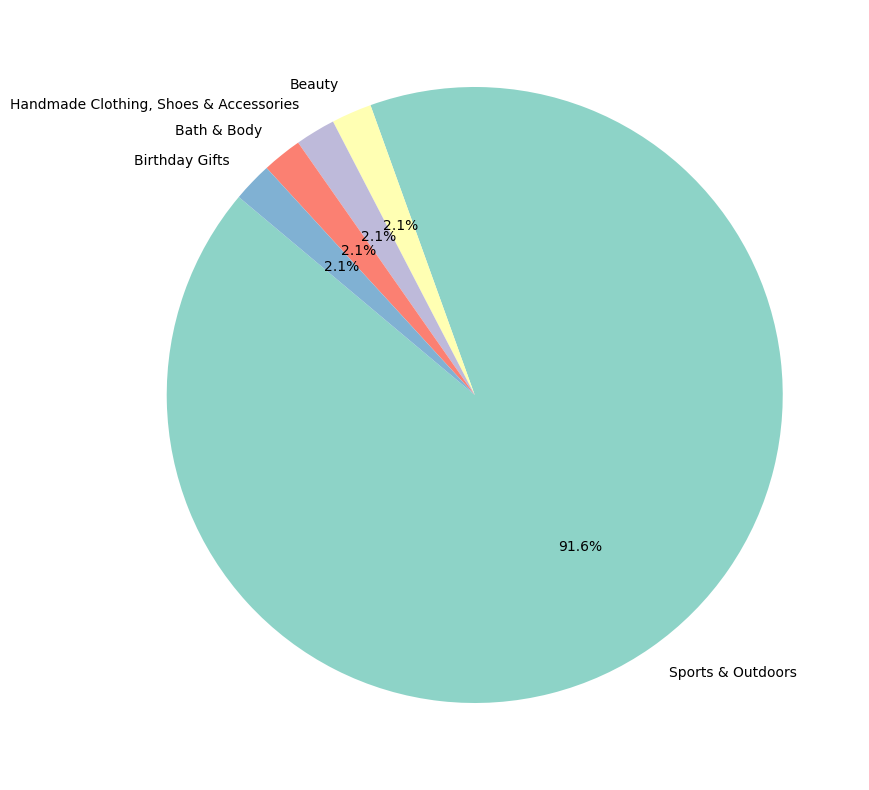

In [372]:
# For the pie chart I'll only take the top 5 categories
top_5_categories = df['category'].value_counts().head(5)

# Create a pie chart for the top 5 most listed categories
plt.figure(figsize=(10, 10))
colors = sns.color_palette("Set3", len(top_5_categories))
plt.pie(top_5_categories, labels=top_5_categories.index, autopct='%1.1f%%', startangle=140, colors=colors)

#### Analysis 
*  "Sports & Outdoors" category has a significantly higher number of listings compared to the other categories  The overwhelming number of listings suggests that this category is a major focus area for sellers and potentially a very competitive market.
*  Other Categories: Categories like "Beauty," "Handmade Clothing, Shoes & Accessories," and "Bath & Body" have relatively smaller bars, indicating that while they are popular, they are far less represented compared to "Sports & Outdoors."

## Part 2: Delving into Product Pricing
__Business Question:__ How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. __Measures of Centrality:__

   * Calculate the mean, median, and mode for the price of products.
   * What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [375]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [376]:
# Summary statistics for the column 'price'
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [377]:
# Calculate the mean price (average price)
mean_price = df['price'].mean()
mean_price

89.24380943923663

In [378]:
# Calculate the median price
median_price = df['price'].median()
median_price

19.09

In [379]:
# Calculate the mode price (most common price)
mode_price = df['price'].mode()[0]  # .mode() returns a Series, so take the first value
mode_price 

9.99

##### Comparison between mean price and mode price
There is a significant difference between the mean price (89.24) and the mode price (9.99).
- Why this difference?: This large gap indicates that while most products are priced around 9.99, a smaller number of expensive items (perhaps high-end electronics or premium products) are pulling the mean price upwards.
- The mode tells us that the majority of products listed are relatively low-cost, but the mean being much higher suggests that outliers (higher-priced items) have a strong effect on the average.

2. __Measures of Dispersion:__

   * Determine the variance, standard deviation, range, and interquartile range for product price.
   * How varied are the product prices? Are there any indicators of a significant spread in prices?

In [382]:
# Variance of the price
variance = df['price'].var()
variance

119445.48532256528

In [383]:
# Standard deviation of the price
std_dev = df['price'].std()
std_dev

345.60886175352226

In [384]:
# Range of the price
price_range = df['price'].max() - df['price'].min()
price_range

100000.0

In [385]:
# Interquartile range (IQR) of the price
Q1 = df['price'].quantile(0.25)  # First quartile (25th percentile)
print(f"Q1: (quantile 0.25) = {Q1}")

Q3 = df['price'].quantile(0.75)  # Third quartile (75th percentile)
print(f"Q3: (quantile 0.75) = {Q3}")


IQR = Q3 - Q1 # Measures the spread of the middle 50% of the data.
IQR

Q1: (quantile 0.25) = 9.99
Q3: (quantile 0.75) = 45.99


36.0

__Analysis:__

Based on the results, the product prices show a __significant variation__, with clear indicators of a wide spread in pricing across the dataset. 

* __Standard Deviation: 345.61:__ A very high standard deviation shows that prices typically deviate quite far from the mean price (89.24). This suggests that there are many outliers, particularly high-priced products that are increasing the variability.

* __Range: 10000__: The range shows that the most expensive product costs 10000 times more than the cheapest product.
This is a massive price spread, further indicating the presence of outliers (very expensive products) that stretch the distribution.

* __Interquartile Range (IQR) = 36:__ The middle 50% of the products are priced between 9.99 (25th percentile) and 45.99 (75th percentile This suggests that, despite the extreme values (like the 10000 product), most products are clustered within a relatively smaller price range. This clustering within a 36 range means the majority of products are lower-cost, but the extreme outliers inflate the spread.

<br>
<br>
<br>

3. __Visualizations:__

   * Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
   * Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [388]:
# Shape of the Distribution
skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

skewness_price, kurtosis_price

(27.492977566280338, 4241.616412866518)

* Skewness of 'price': (27.49)
* Kurtosis of 'price': (4241.61)

Text(0, 0.5, 'Frequency')

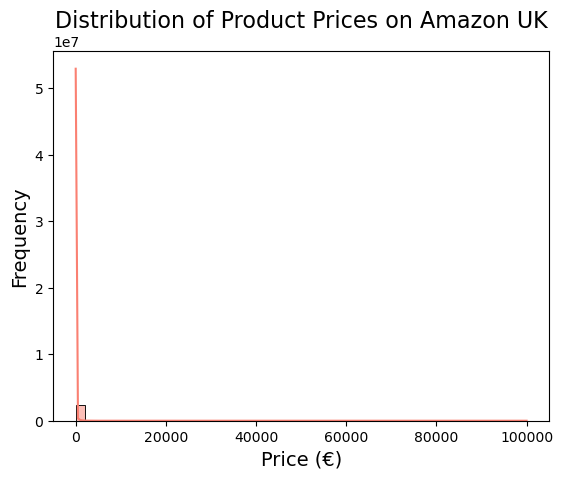

In [390]:
# To determine if there is a specific price range where most products fall, 
# we can use a histogram to visualize the distribution of product prices. 

# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df['price'], kde=True, bins=50, color="salmon");

# Adding labels and title
plt.title('Distribution of Product Prices on Amazon UK', fontsize=16)
plt.xlabel('Price (€)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

The histogram is difficult to interpret because the x-axis scale is stretched due to a small number of extremely high-priced products (outliers), which makes it impossible to see the distribution of the majority of products.

Possible Solution:
* Check for outliers in the data and remove or limit them. Then, to avoid the frequency distortion, we can replot the histogram after addressing the issue.

In [392]:
# Check for outliers in the dataset (products priced extremely high)
df['price'].describe()

# Display products with very high prices to check for outliers
df[df['price'] > 5000]  # Check for prices higher than 5000

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
18179,19721,B0B9G7M81L,KHPL Portable Handheld Chroma Meter Portable C...,0.0,0,5339.67,False,0,Lab & Scientific Products
48738,53189,B0CHW1PBGX,ROLTIN Fireplace Electric Fireplace Stove Heat...,0.0,0,8225.98,False,0,"Fireplaces, Stoves & Accessories"
49843,54295,B0CBK53WGX,Electronic Fireplace Decorate Built-in Embedde...,0.0,0,10371.02,False,0,"Fireplaces, Stoves & Accessories"
49845,54297,B0CBK3LBYD,Electric Fireplace Stand Winter Column Electri...,0.0,0,10031.42,False,0,"Fireplaces, Stoves & Accessories"
49846,54298,B0CBK3DGYR,Electronic Fireplace Water Vapor Fireplace Ele...,0.0,0,10700.75,False,0,"Fireplaces, Stoves & Accessories"
...,...,...,...,...,...,...,...,...,...
2438009,2819675,B0CKX7492P,7-Foot Pool And Table Tennis Multi Game with P...,0.0,0,9336.50,False,0,Table Tennis
2438062,2819728,B0CJNSKBCB,"Tennis Table,Full Size Folding Strong MDF Plat...",0.0,0,5200.91,False,0,Table Tennis
2438064,2819730,B0CJNRJ493,"Table Tennis Table, Household Folding Standard...",0.0,0,6154.40,False,0,Table Tennis
2438117,2819784,B0CKX52Z7J,"Tennis Table,Full Size Folding Strong MDF Plat...",0.0,0,5138.50,False,0,Table Tennis


In [393]:
# Cap prices at 5000 to remove unrealistic outliers
df_cleaned = df[df['price'] <= 5000]

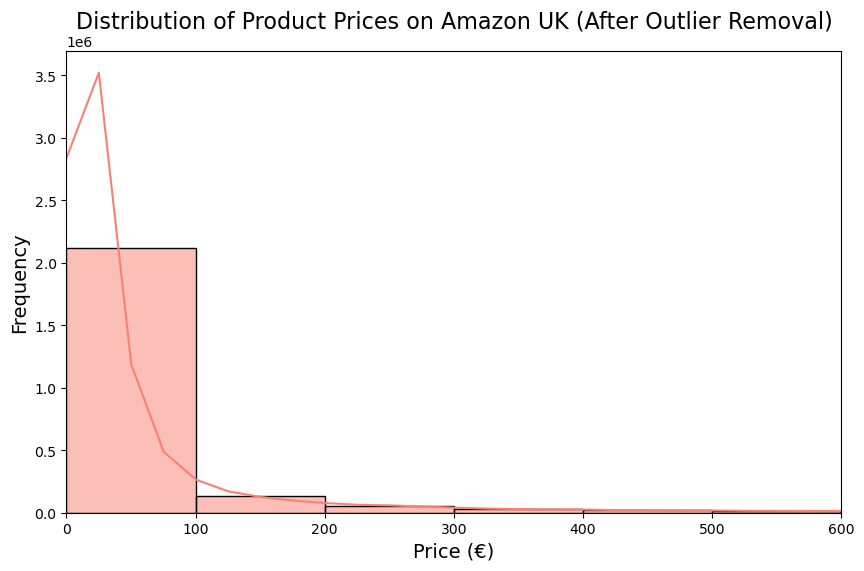

In [394]:
# Replot the histogram after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True, color='salmon')

plt.title('Distribution of Product Prices on Amazon UK (After Outlier Removal)', fontsize=16)
plt.xlabel('Price (€)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xlim(0, 600) 
plt.show()

Price Concentration Around Lower Values:
- The majority of products are priced below 100.
- There's a sharp spike in frequency for products in the 0€ to 50€ range. This indicates that most of the products listed on Amazon UK fall within this low price range.
- Products priced between 50€ and 100€ still have a noticeable frequency, but it's much lower than the very low-cost products

Rapid Decline After 100€:
- After 100€, the number of products drops drastically.
- Products priced above 200€ become very rare, and beyond 300€, there are almost no listings.

Skewed Distribution: The data is right-skewed, meaning the bulk of the products are on the lower end of the price spectrum, while the higher-priced products are much rarer. This results in a long right tail, which means while there are some expensive products, they are not as frequent as the lower-priced ones.

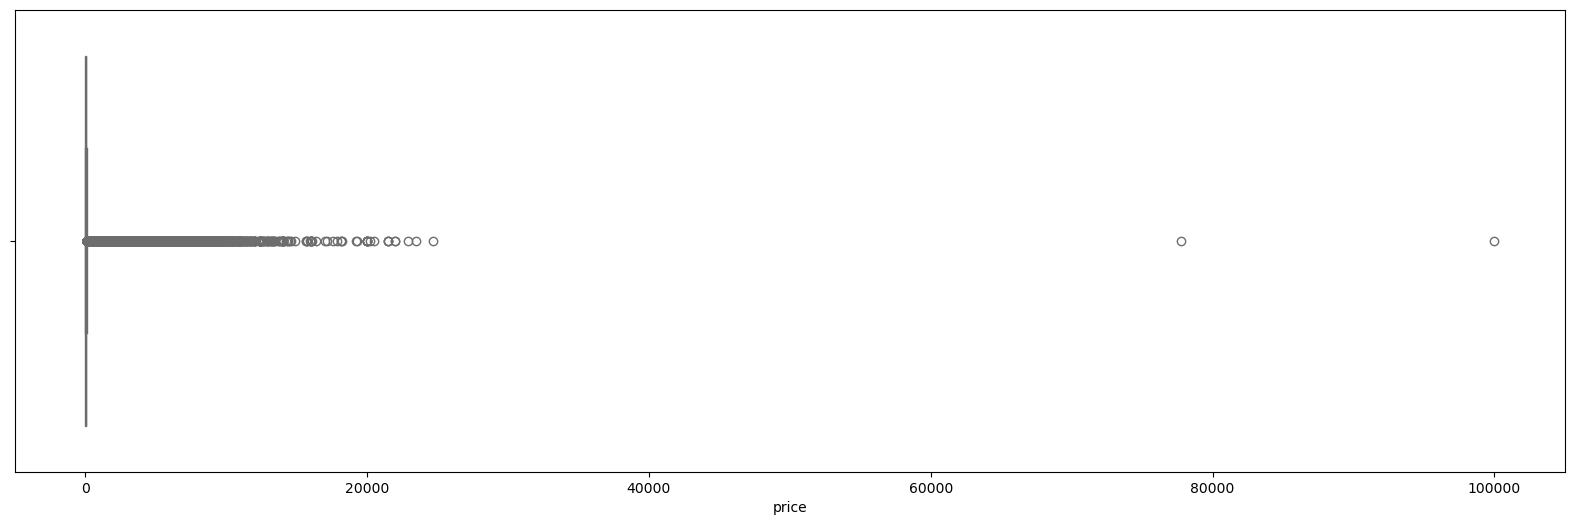

In [396]:
# Plot a box plot for 'price' to visualize its central tendency, spread, and outliers.
plt.figure(figsize=(20, 6))
sns.boxplot(x=df['price'], color='salmon')

plt.show()

* There are significant outliers in the product pricing . These outliers extend all the way to the 100000 mark, which is extremely high for typical Amazon product prices.
* These outliers are the products causing the distortion in the plot and represent the small number of very expensive items.
* Right-Skewed Distribution: the data is heavily right-skewed, meaning most products are low-priced, but a small number of high-priced products extend far to the right, creating a long tail.
* Extreme Outliers: These high-priced products (likely luxury items, high-end electronics, or specialized products) are skewing the plot, making it difficult to visualize the spread of most of the data.

<br>
<br>

## Part 3: Unpacking Product Ratings
__Business Question:__ How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. __Measures of Centrality:__

   * Calculate the mean, median, and mode for the _rating_ of products.
   * How do customers generally rate products? Is there a common trend?

In [399]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [400]:
df['stars'].dtype

dtype('float64')

In [401]:
# Frecuency table for 'stars'
stars_frequency = df['stars'].value_counts()
display(stars_frequency)

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [402]:
# Checking for missing data
df['stars'].isnull().sum()

0

In [403]:
# Remove rows where the 'stars' column is 0.0 (likely missing values)
df_cleaned = df[df['stars'] != 0.0]

df_cleaned.shape

(1218010, 9)

In [404]:
# Summary statistics for the column 'stars'
df_cleaned['stars'].describe()

count    1.218010e+06
mean     4.319161e+00
std      5.552868e-01
min      1.000000e+00
25%      4.100000e+00
50%      4.400000e+00
75%      4.600000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [405]:
# Calculate the mean stars (average rating)
mean_rating = df_cleaned['stars'].mean()
mean_rating

4.31916076222691

In [406]:
# Calculate the median stars (median rating)
median_rating = df_cleaned['stars'].median()
median_rating

4.4

In [407]:
# Calculate the moda stars (moda rating)
mode_rating = df_cleaned['stars'].mode()[0]
mode_rating

4.5

__How Do Customers Generally Rate Products?__
- Customers tend to rate products very highly, as indicated by the mean, median, and mode all being over 4.0 stars. This strong bias towards higher ratings reflects a general satisfaction with the products available on Amazon UK.
- 75% of the ratings are above 4.0 stars.

2. __Measures of Dispersion:__

* Determine the variance, standard deviation, and interquartile range for product rating.
* Are the ratings consistent, or is there a wide variation in customer feedback?

In [410]:
# Variance of the rating
variance = df_cleaned['stars'].var()
variance

0.3083433752380519

In [411]:
# Standard deviation of the rating
std_dev = df_cleaned['stars'].std()
std_dev

0.5552867504614637

In [412]:
# Range of the rating
rating_range = df_cleaned['stars'].max() - df['stars'].min()
rating_range

5.0

In [413]:
# Interquartile range (IQR) of the rating
Q1 = df_cleaned['stars'].quantile(0.25)  # First quartile (25th percentile)
print(f"Q1: (quantile 0.25) = {Q1}")

Q3 = df_cleaned['stars'].quantile(0.75)  # Third quartile (75th percentile)
print(f"Q3: (quantile 0.75) = {Q3}")


IQR = Q3 - Q1 # Measures the spread of the middle 50% of the data.
IQR

Q1: (quantile 0.25) = 4.1
Q3: (quantile 0.75) = 4.6


0.5

__Analysis:__
* Consistency in Ratings: The low variance and standard deviation indicate that most ratings are closely concentrated around the mean, suggesting high consistency in customer feedback. The IQR of 0.5 confirms that the middle 50% of the ratings are tightly packed between 4.1 and 4.6, showing that a large portion of customers tends to rate products within this range.

* Limited Variation: The concentration of ratings in a narrow range (with most between 4.1 and 4.6) indicates that there isn't a wide variation in customer feedback, and ratings are relatively uniform.

<br>
<br>

3. __Shape of the Distribution:__
* Calculate the skewness and kurtosis for the rating column.
* Are the ratings normally distributed, or do they lean towards higher or lower values?

In [467]:
# Shape of the Distribution
skewness_rating = df_cleaned['stars'].skew()
kurtosis_rating = df_cleaned['stars'].kurtosis()

skewness_rating, kurtosis_rating

(-2.3795681122127945, 9.78193769066435)

- The negative skewness indicates that the distribution is left-skewed. This means that the majority of the ratings are concentrated at the higher end (closer to 5 stars), but there is a long tail on the left side, reflecting some lower ratings (e.g., 1-star and 2-star reviews).
- A skewness value of -2.38 is quite pronounced, confirming that most products receive high ratings, with relatively fewer ratings on the lower end.
- A kurtosis value of 9.78 is much higher than 3, which indicates that the distribution is leptokurtic. This means the distribution has heavy tails, or in other words, there are more extreme values (outliers) compared to a normal distribution.

__Conclusion:__
- The product ratings are __not normally distributed__. Instead, they are heavily left-skewed towards high ratings with a peak around 4-5 stars, reflecting that most customers are generally satisfied with their purchases.
- The high kurtosis shows that while most ratings are clustered at the high end, a small number of products receive extremely low ratings, contributing to the long left tail.

<br>
<br>

4. __Visualizations:__
* Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

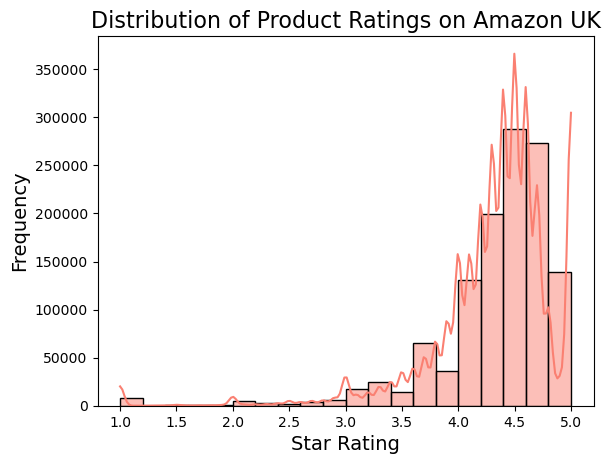

In [470]:
# Plotting a histogram for the 'stars' column in the cleaned dataset
#plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['stars'], bins=20, kde=True, color='salmon')

# Adding labels and title
plt.title('Distribution of Product Ratings on Amazon UK', fontsize=16)
plt.xlabel('Star Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

__Most Common Rating:__
The peak of the distribution is at 4.5 stars, meaning that the majority of products are rated around this level. This aligns with the mode we calculated earlier, which was also 4.5 stars.